In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
train = pd.read_csv('titanic_train.csv')

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
test = pd.read_csv('titanic_test.csv')

42.0
26.5
24.0


<AxesSubplot:>

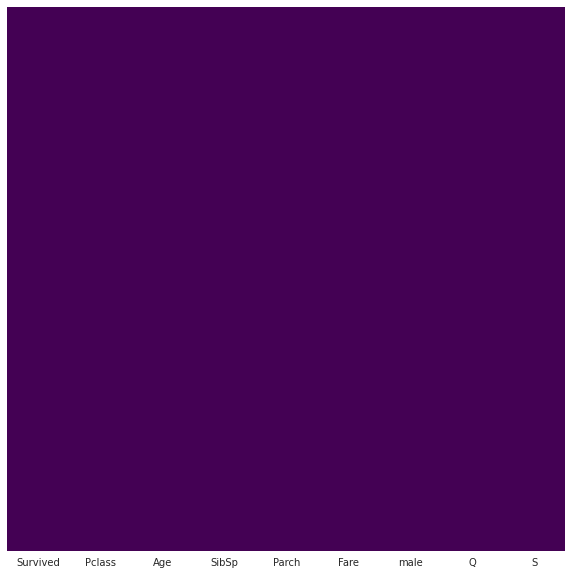

In [106]:
plt.figure(figsize = (10,10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

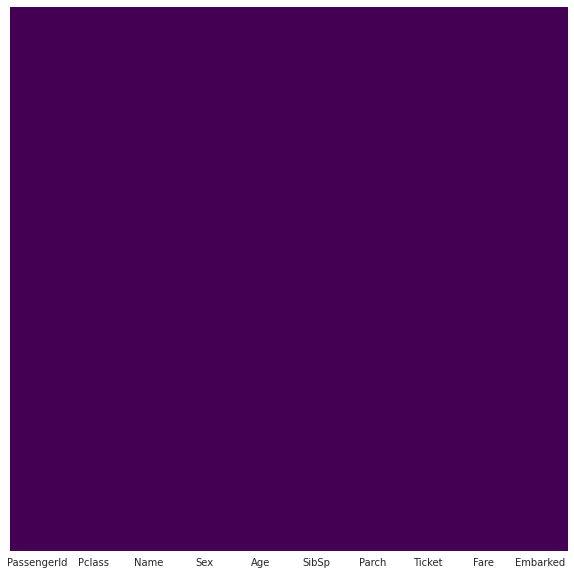

In [163]:
plt.figure(figsize = (10,10))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [150]:
test.drop('Cabin',axis=1,inplace=True)

In [161]:
test.iloc[152] = test['Fare'].mean()

In [59]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

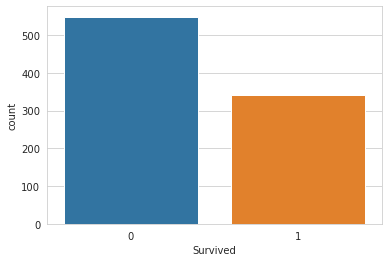

In [60]:
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

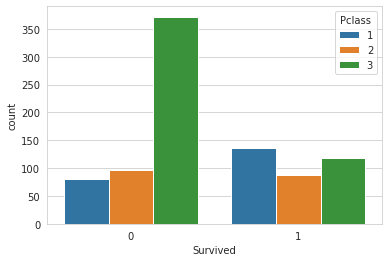

In [61]:
sns.countplot(x='Survived', data=train, hue='Pclass')

<AxesSubplot:xlabel='Age', ylabel='Count'>

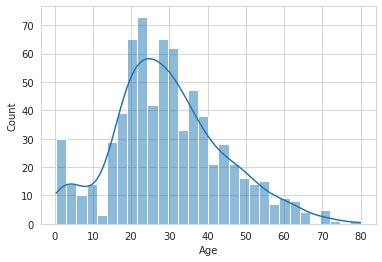

In [62]:
sns.histplot(train['Age'].dropna(),bins=30,kde=True)

In [63]:
import cufflinks as cf

In [64]:
cf.go_offline()

In [65]:
train['Fare'].iplot(kind='hist',bins=30)

In [66]:
print(train[train['Pclass']==1]['Age'].median())
print(train[train['Pclass']==2]['Age'].median())
print(train[train['Pclass']==3]['Age'].median())

37.0
29.0
24.0


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

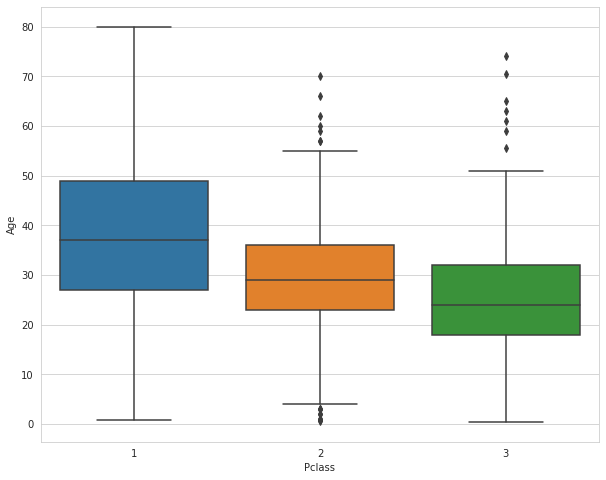

In [67]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass',y='Age',data=train)

In [118]:
print(test[test['Pclass']==1]['Age'].median())
print(test[test['Pclass']==2]['Age'].median())
print(test[test['Pclass']==3]['Age'].median())

42.0
26.5
24.0


In [119]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        else:
            return 24
    else:
        return Age

In [120]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [69]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)

In [70]:
train.drop('Cabin',axis=1,inplace=True)

In [71]:
train.dropna(inplace=True)

<AxesSubplot:>

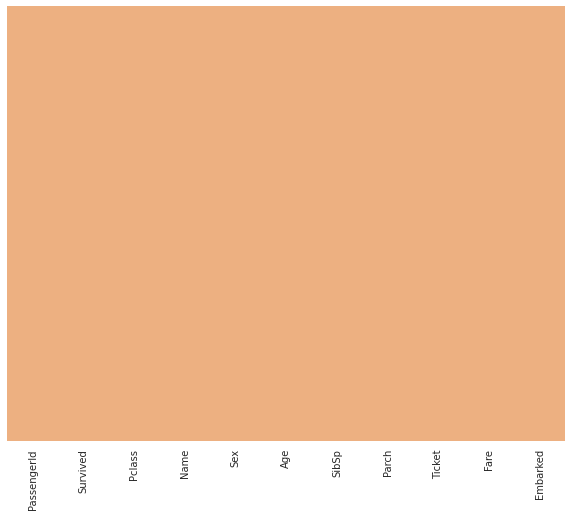

In [72]:
plt.figure(figsize=(10,8))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='flare')

In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [165]:
sex_test = pd.get_dummies(test['Sex'],drop_first=True)

In [166]:
embark_test = pd.get_dummies(test['Embarked'],drop_first=True)

In [74]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [75]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [76]:
train = pd.concat([train,sex,embark],axis=1)

In [77]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [168]:
test = pd.concat([test,sex_test,embark_test],axis=1)

In [169]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,892.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,Q,0,1,0,1,0
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,S,1,0,0,0,1
2,894.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,Q,0,1,0,1,0
3,895.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,S,0,1,0,0,1
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,S,1,0,0,0,1


In [171]:
test.drop(['Name','Sex','PassengerId','Ticket','Embarked'],axis=1,inplace=True)

In [78]:
train.drop(['Name','Sex','Embarked','Ticket'],axis=1,inplace=True)

In [79]:
train.drop('PassengerId',axis=1,inplace=True)

In [189]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3.0,34.5,0.0,0.0,7.8292,1,1,0
1,3.0,47.0,1.0,0.0,7.0000,0,0,1
2,2.0,62.0,0.0,0.0,9.6875,1,1,0
3,3.0,27.0,0.0,0.0,8.6625,1,0,1
4,3.0,22.0,1.0,1.0,12.2875,0,0,1


In [175]:
test.drop(['female','C'],axis=1,inplace=True)

In [178]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [180]:
X = train.drop(('Survived'), axis=1)
y = train['Survived']

In [188]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [181]:
from sklearn.linear_model import LogisticRegression

In [182]:
logmodel = LogisticRegression(max_iter=1000)

In [183]:
logmodel.fit(X,y)

LogisticRegression(max_iter=1000)

In [184]:
predictions =  logmodel.predict(test)

In [185]:
from sklearn.metrics import classification_report

In [187]:
print(classification_report(test[''], predictions))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [90]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 32,  72]])